# Exploring the Dynamics of Financial Data Products

I decided to use Santander's [Kaggle dataset]('https://www.kaggle.com/c/santander-product-recommendation/data') to try to understand their business model and to potentially find solutions to trends, given my research on their company, their industry, and the health of the global financial system.

[Formatting Data](#Formatting Data)

[Visualizing data](#Visualizing Data)

[Splitting Data](#Splitting Data)

[Modeling Data](#Modeling Data)

[Model Validation](#Model Validation)

## Formatting Data

<a id='Formatting Data'></a>

In [2]:
import numpy as np#Math library
import pandas as pd#Table library
import matplotlib.pyplot as plt#Plotting library
import pandas as pd
import warnings
import seaborn as sns#Plotting library
warnings.filterwarnings('ignore')#Gets rid of popup warnings
%matplotlib nbagg

In [3]:
#Load data 
data= pd.read_csv('train_ver2.csv')

In [114]:
data.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


Here's an key for the column names (many of which are in Spanish). Just for reference, Santander is a bank.

* Column Name	Description

* fecha_dato	The table is partitioned for this column
* ncodpers	Customer code
* ind_empleado	Employee index: A active, B ex employed, F filial, N not employee, P pasive
* pais_residencia	Customer's Country residence
* sexo	Customer's sex
* age	Age
* fecha_alta	The date in which the customer became as the first holder of a contract in the bank
* ind_nuevo	New customer Index. 1 if the customer registered in the last 6 months.
* antiguedad	Customer seniority (in months)
* indrel	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
* ult_fec_cli_1t	Last date as primary customer (if he isn't at the end of the month)
* indrel_1mes	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
* tiprel_1mes	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
* indresi	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
* indext	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
* conyuemp	Spouse index. 1 if the customer is spouse of an employee
* canal_entrada	channel used by the customer to join
* indfall	Deceased index. N/S
* tipodom	Addres type. 1, primary address
* cod_prov	Province code (customer's address)
* nomprov	Province name
* ind_actividad_cliente	Activity index (1, active customer; 0, inactive customer)
* renta	Gross income of the household
* segmento	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
* ind_ahor_fin_ult1	Saving Account
* ind_aval_fin_ult1	Guarantees
* ind_cco_fin_ult1	Current Accounts
* ind_cder_fin_ult1	Derivada Account
* ind_cno_fin_ult1	Payroll Account
* ind_ctju_fin_ult1	Junior Account
* ind_ctma_fin_ult1	Más particular Account
* ind_ctop_fin_ult1	particular Account
* ind_ctpp_fin_ult1	particular Plus Account
* ind_deco_fin_ult1	Short-term deposits
* ind_deme_fin_ult1	Medium-term deposits
* ind_dela_fin_ult1	Long-term deposits
* ind_ecue_fin_ult1	e-account
* ind_fond_fin_ult1	Funds
* ind_hip_fin_ult1	Mortgage
* ind_plan_fin_ult1	Pensions
* ind_pres_fin_ult1	Loans
* ind_reca_fin_ult1	Taxes
* ind_tjcr_fin_ult1	Credit Card
* ind_valo_fin_ult1	Securities
* ind_viv_fin_ult1	Home Account
* ind_nomina_ult1	Payroll
* ind_nom_pens_ult1	Pensions
* ind_recibo_ult1	Direct Debit

In [5]:
#Now let's look at the data types since we can't see every column in our table
data.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [128]:
#Let's convert our dates to datetime objects to see when these customers created their accounts
data['fecha_dato']= pd.to_datetime(data['fecha_dato'])
data['fecha_alta']= pd.to_datetime(data['fecha_alta'])

In [129]:
#Let's see how many original timestamps are associated with each row
months= data['fecha_dato'].unique()
months

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
#Get the names of the columns that include sales
data.ix[0:1,24:].columns

Index([u'ind_ahor_fin_ult1', u'ind_aval_fin_ult1', u'ind_cco_fin_ult1',
       u'ind_cder_fin_ult1', u'ind_cno_fin_ult1', u'ind_ctju_fin_ult1',
       u'ind_ctma_fin_ult1', u'ind_ctop_fin_ult1', u'ind_ctpp_fin_ult1',
       u'ind_deco_fin_ult1', u'ind_deme_fin_ult1', u'ind_dela_fin_ult1',
       u'ind_ecue_fin_ult1', u'ind_fond_fin_ult1', u'ind_hip_fin_ult1',
       u'ind_plan_fin_ult1', u'ind_pres_fin_ult1', u'ind_reca_fin_ult1',
       u'ind_tjcr_fin_ult1', u'ind_valo_fin_ult1', u'ind_viv_fin_ult1',
       u'ind_nomina_ult1', u'ind_nom_pens_ult1', u'ind_recibo_ult1'],
      dtype='object')

In [8]:
sales= data.ix[:,24:]
sales.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
#Get the totals 
totals= sales.sum()

In [10]:
totalDF= pd.DataFrame(totals).reset_index()
totalDF.columns= ['account', 'sales']
totalDF= totalDF.sort_values('sales', ascending= False)
totalDF.head()

,account,sales
2,ind_cco_fin_ult1,8945588.0
7,ind_ctop_fin_ult1,1760616.0
23,ind_recibo_ult1,1745712.0
12,ind_ecue_fin_ult1,1129227.0
4,ind_cno_fin_ult1,1103620.0


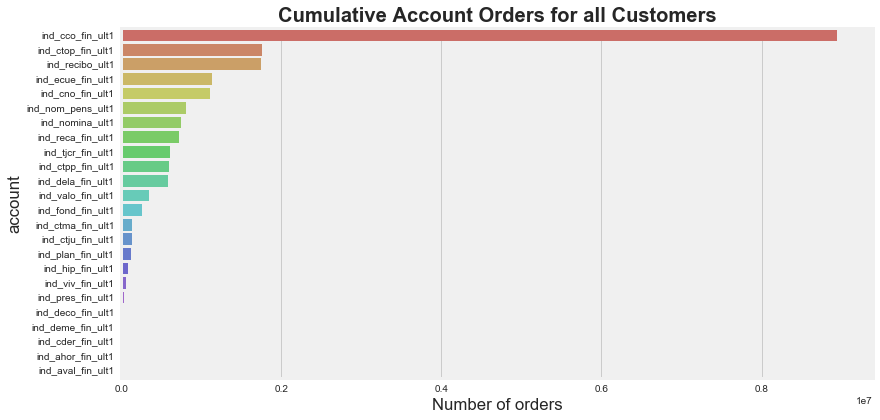

In [111]:
%matplotlib inline
plt.style.use('fivethirtyeight')
figure, ax = plt.subplots(1,1,figsize=(12,6),  facecolor='white')
sns.barplot(x= 'sales', y= 'account', data= totalDF, palette= 'hls')
plt.xlabel('Number of orders')
plt.title('Cumulative Account Orders for all Customers', fontweight= 'bold')

Excellent, so <strong>ind_cco_fin_ult1 (current accounts)</strong> is the largest contributor to the total number of orders that Santander has from their customers by a lot. From Santander's [website]('http://www.santander.co.uk/uk/current-accounts'), we see that current accounts refers to what would normally be referred to as checking accounts. This makes a lot of sense since this is the most basic type of account and one could think as the others being 'luxury' items.

In [15]:
#Let's append the date column to our truncated dataset 
sales['date']= data['fecha_dato']

In [16]:
monthlyTotals= np.empty((24,1))

for i in range(0,len(months)):
    monthlyTotals = np.concatenate((monthlyTotals, sales[sales['date'] == months[i]].ix[:, sales.columns != 'date'].sum().values.reshape((24,1))), axis=1)

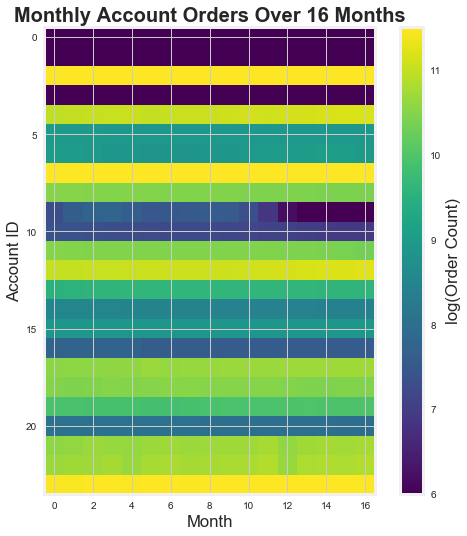

In [110]:
%matplotlib inline 
plt.style.use('fivethirtyeight')
figure, ax = plt.subplots(1,1,figsize=(8,8),  facecolor='white')
plt.imshow(np.log(monthlyTotals), cmap= 'viridis', vmax= 11.5, vmin= 6)
plt.xlabel('Month')
plt.ylabel('Account ID')
plt.title('Monthly Account Orders Over 16 Months', fontweight= 'bold')
plt.colorbar(label='log(Order Count)')

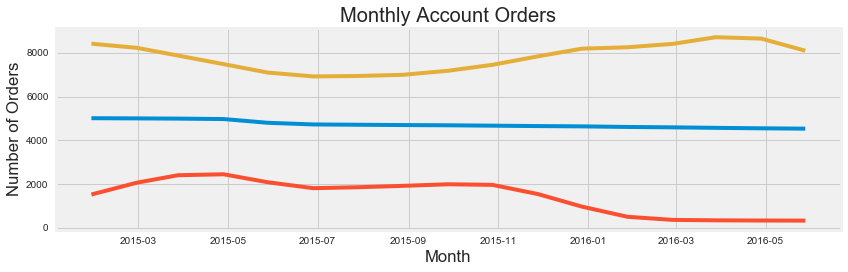

In [131]:
#Now let's plot a few of the accounts that have some volatility
plt.subplots(figsize=(12,4), facecolor= 'white')
plt.plot(months, monthlyTotals[14,:])
plt.plot(months, monthlyTotals[9,:])
plt.plot(months, monthlyTotals[6,:])
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Account Orders')
plt.tight_layout()

The next thing I'd like to figure out is if we can segment customers based on the total number of items that they have purchased? How about the average number per month? I'd also like to know the distribution of 

In [121]:
data['fecha_alta'].head()

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

In [126]:
type(data['fecha_alta'][0])

pandas.tslib.Timestamp

In [117]:
len(data['fecha_alta'].unique())

6757

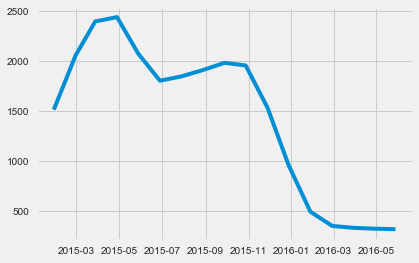

In [130]:
plt.plot(months,monthlyTotals[9,:])

In [ ]:
What do we have so far? 
* Monthly data for all customers and their financial products
* 

In [78]:
sales= []
counts= []
for i in months:
    counts.append(data['fecha_dato'][data['fecha_dato'] == '2015-01-28'].count())
    

In [ ]:
data[data['fecha_dato']== months[0]].sum()

In [1]:
print 'hello'

hello


So just as a summary, the info we have about customers includes:
* Location
* Purchase history
* Age
* Sex
* State of employment
* State of membership
*Gross income of household

Given that, the task of this original dataset was to make future recommendations for purchases. For this project, I'll instead focus on taking this data to do a different type of analytics project. 

If we assume that the data landscape is composed of: a) Predictive analytics b) Business intelligence c) Data Management d) Data as a service and e) Infrastructure

We can assume that we'll define our service as a diversified analytics service. Knowing what we know we have to define our 'Whole Product': what is the minimum set of products and services needed to fulfill customer's compelling reason for using our product. 

For our company here we know of: https://www.kaggle.com/c/santander-product-recommendation

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>